## Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from ast import literal_eval

## Perform EDA

In [2]:
arxiv_data = pd.read_csv(
    'https://github.com/soumik12345/multi-label-text-classification/releases/download/v0.2/arxiv_data.csv'
)
arxiv_data.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [3]:
print('There are {} registers in the dataset'.format(len(arxiv_data)))

There are 51774 registers in the dataset


In [4]:
total_duplicate_titles = sum(arxiv_data["titles"].duplicated())
print('There are {} duplicated titles'.format(total_duplicate_titles))

There are 12802 duplicated titles


In [5]:
arxiv_data.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [6]:
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print('There are {} registers in the deduplicated dataset'.format(len(arxiv_data)))

There are 38972 registers in the deduplicated dataset


In [7]:
arxiv_data["terms"].value_counts()

['cs.CV']                                          12747
['cs.LG', 'stat.ML']                                4074
['cs.LG']                                           2046
['cs.CV', 'cs.LG']                                  1486
['cs.LG', 'cs.AI']                                  1206
                                                   ...  
['cs.LG', 'cs.CL', 'cs.HC', 'stat.ML']                 1
['cs.LG', 'cs.AI', 'cs.CL', 'cs.PL', 'stat.ML']        1
['cs.LG', 'cs.CL', 'stat.ME', 'stat.ML']               1
['cs.LG', 'cs.CL', 'cs.LO', 'stat.ML']                 1
['stat.ML', 'cs.CV', 'cs.LG', 'q-bio.QM']              1
Name: terms, Length: 3157, dtype: int64

In [8]:
print(sum(arxiv_data["terms"].value_counts() == 1))

2321


In [9]:
print(arxiv_data["terms"].nunique())

3157


In [10]:
arxiv_data_filtered = arxiv_data.groupby("terms").filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(36651, 3)

In [11]:
arxiv_data_filtered.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [12]:
arxiv_data_filtered["terms"].value_counts()

['cs.CV']                                                         12747
['cs.LG', 'stat.ML']                                               4074
['cs.LG']                                                          2046
['cs.CV', 'cs.LG']                                                 1486
['cs.LG', 'cs.AI']                                                 1206
                                                                  ...  
['cs.CV', 'cs.LG', 'eess.IV', 'eess.SP', 'stat.ML']                   2
['cs.LG', 'cs.CL', 'cs.CV', 'cs.NE', 'stat.ML']                       2
['stat.ML', 'cs.IT', 'cs.LG', 'math.IT', 'math.ST', 'stat.TH']        2
['cs.CV', 'cs.CL', 'cs.LG', 'eess.AS', 'eess.IV']                     2
['cs.LG', 'G.3']                                                      2
Name: terms, Length: 836, dtype: int64

## Convert the string labels to lists of strings

In [13]:
arxiv_data_filtered["terms"] = arxiv_data_filtered["terms"].apply(lambda x: literal_eval(x))
arxiv_data_filtered["terms"]

0                    [cs.CV, cs.LG]
1             [cs.CV, cs.AI, cs.LG]
2                    [cs.CV, cs.AI]
3                           [cs.CV]
4                    [cs.CV, cs.LG]
                    ...            
51767                       [cs.CV]
51768                       [cs.CV]
51770                [cs.CV, cs.DM]
51771    [stat.ML, cs.LG, q-bio.GN]
51772                       [cs.CV]
Name: terms, Length: 36651, dtype: object

## Use stratified splits because of class imbalance

In [14]:
test_split = 0.1

train_df, test_df = train_test_split(
    arxiv_data_filtered,
    test_size=test_split,
    stratify = arxiv_data_filtered['terms'].values
)

val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print('Number of registers in train set: {}'.format(len(train_df)))
print('Number of registers in val set: {}'.format(len(val_df)))
print('Number of registers in test set: {}'.format(len(test_df)))

Number of registers in train set: 32985
Number of registers in val set: 1833
Number of registers in test set: 1833


## Multi-label binarization

In [15]:
terms = tf.ragged.constant(train_df['terms'].values)
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
lookup.adapt(terms)

In [16]:
vocab = lookup.get_vocabulary()

In [17]:
print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'eess.IV', 'cs.RO', 'cs.CL', 'cs.NE', 'cs.CR', 'math.OC', 'eess.SP', 'cs.GR', 'cs.SI', 'cs.MM', 'cs.SY', 'cs.IR', 'cs.MA', 'eess.SY', 'cs.HC', 'math.IT', 'cs.IT', 'cs.DC', 'cs.CY', 'stat.AP', 'stat.TH', 'math.ST', 'stat.ME', 'eess.AS', 'cs.SD', 'q-bio.QM', 'q-bio.NC', 'cs.DS', 'cs.GT', 'cs.CG', 'cs.SE', 'cs.NI', 'I.2.6', 'stat.CO', 'math.NA', 'cs.NA', 'physics.chem-ph', 'cs.DB', 'q-bio.BM', 'cs.LO', 'cs.PL', 'cond-mat.dis-nn', '68T45', 'math.PR', 'physics.comp-ph', 'cs.CE', 'cs.AR', 'I.2.10', 'q-fin.ST', 'cond-mat.stat-mech', 'quant-ph', 'math.DS', '68T05', 'cs.CC', 'I.4.6', 'physics.data-an', 'physics.soc-ph', 'physics.ao-ph', 'q-bio.GN', 'econ.EM', 'cs.DM', 'physics.med-ph', 'cs.PF', 'astro-ph.IM', 'I.4.8', 'math.AT', 'I.4', 'q-fin.TR', 'cs.FL', 'I.5.4', 'I.2', '68U10', 'hep-ex', 'cond-mat.mtrl-sci', '68T10', 'physics.geo-ph', 'physics.optics', 'physics.flu-dyn', 'math.AP', 'I.4; I.5', 'I.4.9', 'I.2.6; I.2.8', '68T01', '65D

In [18]:
def invert_multi_hot(encoded_labels):
  """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
  hot_indices = np.argwhere(encoded_labels==1.0)[..., 0]
  return np.take(vocab, hot_indices)

In [19]:
sample_label = train_df["terms"].iloc[0]
print('Original label:', sample_label)

Original label: ['cs.CV']


In [20]:
label_binarized = lookup([sample_label])
print('Label binarized:', label_binarized)

Label binarized: tf.Tensor(
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 153), dtype=float32)


In [21]:
print(len(label_binarized[0]))
print(len(vocab))

153
153


In [22]:
train_df['summaries'].apply(lambda x: len(x.split())).describe()

count    32985.000000
mean       171.662149
std         45.372576
min          5.000000
25%        140.000000
50%        170.000000
75%        201.000000
max        498.000000
Name: summaries, dtype: float64

In [23]:
max_sqlen = 150
batch_size = 128
padding_token = '<pad>'
auto = tf.data.AUTOTUNE

In [24]:
def make_dataset(dataframe, is_train=False):
  labels = tf.ragged.constant(dataframe["terms"].values)
  label_binarized = lookup(labels).numpy()
  dataset = tf.data.Dataset.from_tensor_slices(
      (dataframe['summaries'].values, label_binarized)
  )
  dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
  return dataset.batch(batch_size)

In [25]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df)
test_dataset = make_dataset(test_df)

## Dataset preview

In [26]:
text_batch, label_batch = next(iter(train_dataset))

for text, label_bin in zip(text_batch[:5], label_batch[:5]):
  print('text: {}'.format(text))
  print('label binarized: {}'.format(label_bin))
  print('label: {}'.format(invert_multi_hot(label_bin)))
  print('')

text: b'Implementing color constancy as a pre-processing step in contemporary digital\ncameras is of significant importance as it removes the influence of scene\nillumination on object colors. Several benchmark color constancy datasets have\nbeen created for the purpose of developing and testing new color constancy\nmethods. However, they all have numerous drawbacks including a small number of\nimages, erroneously extracted ground-truth illuminations, long histories of\nmisuses, violations of their stated assumptions, etc. To overcome such and\nsimilar problems, in this paper a color constancy benchmark dataset generator\nis proposed. For a given camera sensor it enables generation of any number of\nrealistic raw images taken in a subset of the real world, namely images of\nprinted photographs. Datasets with such images share many positive features\nwith other existing real-world datasets, while some of the negative features\nare completely eliminated. The generated images can be succe

## Vectorization

In [27]:
vocabulary = set()
train_df['summaries'].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

153251


In [28]:
text_vectorizer_mlp = layers.TextVectorization(
    max_tokens=vocabulary_size,
    ngrams=2,
    output_mode='tf_idf'
)

text_vectorizer_lstm = layers.TextVectorization(
    max_tokens=vocabulary_size,
)

with tf.device("/CPU:0"):
  text_vectorizer_mlp.adapt(train_dataset.map(lambda text, label: text))
  text_vectorizer_lstm.adapt(train_dataset.map(lambda text, label: text))

In [29]:
# MLP
train_dataset_mlp = train_dataset.map(
    lambda text, label: (text_vectorizer_mlp(text), label), num_parallel_calls=auto
).prefetch(auto)

validation_dataset_mlp = validation_dataset.map(
    lambda text, label: (text_vectorizer_mlp(text), label), num_parallel_calls=auto
).prefetch(auto)

test_dataset_mlp = test_dataset.map(
    lambda text, label: (text_vectorizer_mlp(text), label), num_parallel_calls=auto
).prefetch(auto)

# LSTM
train_dataset_lstm = train_dataset.map(
    lambda text, label: (text_vectorizer_lstm(text), label), num_parallel_calls=auto
).prefetch(auto)

validation_dataset_lstm = validation_dataset.map(
    lambda text, label: (text_vectorizer_lstm(text), label), num_parallel_calls=auto
).prefetch(auto)

test_dataset_lstm = test_dataset.map(
    lambda text, label: (text_vectorizer_lstm(text), label), num_parallel_calls=auto
).prefetch(auto)

## Create a text classification model

In [30]:
def make_model(model_type='mlp'):
  if model_type == 'mlp':
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
    ])
  elif model_type == 'lstm':
    model = keras.Sequential([
        layers.Embedding(input_dim=len(text_vectorizer_lstm.get_vocabulary()), output_dim=64, mask_zero=True), # Use masking to handle the variable sequence lengths
        layers.Bidirectional(layers.LSTM(64)),
        keras.layers.Dense(64, activation='relu'),
        layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
    ])
  return model

## Train the model

In [31]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=3,
    monitor='val_loss',
    min_delta=0.001,
    mode='min',
    verbose=1,
    restore_best_weights=True,
)

## MLP

Epoch 1/20
258/258 [==============================] - 16s 57ms/step - loss: 0.0323 - categorical_accuracy: 0.8543 - val_loss: 0.0182 - val_categorical_accuracy: 0.8887
Epoch 2/20
258/258 [==============================] - 13s 51ms/step - loss: 0.0031 - categorical_accuracy: 0.8946 - val_loss: 0.0245 - val_categorical_accuracy: 0.8822
Epoch 3/20
258/258 [==============================] - 14s 54ms/step - loss: 8.1897e-04 - categorical_accuracy: 0.8643 - val_loss: 0.0309 - val_categorical_accuracy: 0.8849
Epoch 4/20
258/258 [==============================] - 13s 51ms/step - loss: 4.3732e-04 - categorical_accuracy: 0.8520 - val_loss: 0.0342 - val_categorical_accuracy: 0.8833
Epoch 4: early stopping


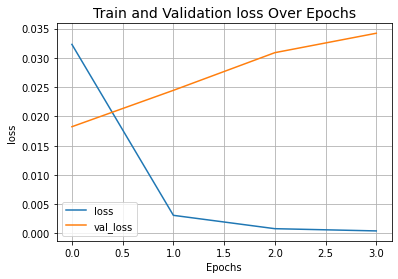

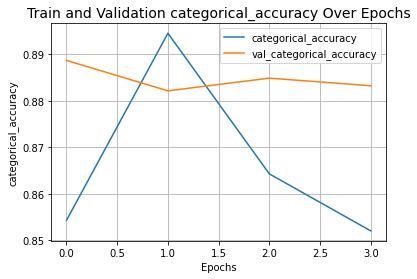

In [32]:
epochs = 20

model = make_model('mlp')
model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["categorical_accuracy"]
)

history = model.fit(
    train_dataset_mlp, validation_data=validation_dataset_mlp, epochs=epochs, callbacks=[early_stopping]
)


def plot_result(item):
  plt.plot(history.history[item], label=item)
  plt.plot(history.history["val_" + item], label="val_" + item)
  plt.xlabel("Epochs")
  plt.ylabel(item)
  plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
  plt.legend()
  plt.grid()
  plt.show()

plot_result("loss")
plot_result("categorical_accuracy")

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               78465024  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 153)               39321     
                                                                 
Total params: 78,635,673
Trainable params: 78,635,673
Non-trainable params: 0
_________________________________________________________________


## Evaluate the model

In [35]:
_, categorical_acc = model.evaluate(test_dataset_mlp)
print(f"Categorical accuracy on the test set: {round(categorical_acc * 100, 2)}%.")

15/15 [==============================] - 2s 94ms/step - loss: 0.0192 - categorical_accuracy: 0.8816
Categorical accuracy on the test set: 88.16%.


## Inference

In [36]:
# Create a model for inference.
model_for_inference = keras.Sequential([text_vectorizer_mlp, model])

# Create a small dataset just for demoing inference.
inference_dataset = make_dataset(test_df.sample(100), is_train=False)
text_batch, label_batch = next(iter(inference_dataset))
predicted_probabilities = model_for_inference.predict(text_batch)

# Perform inference.
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    predicted_proba = [proba for proba in predicted_probabilities[i]]
    top_3_labels = {}
    for score, x in sorted(zip(predicted_probabilities[i], lookup.get_vocabulary()), key=lambda pair: pair[0], reverse=True)[:3]:
      top_3_labels[x] = round(score, 3)
    print(top_3_labels)
    print(f"Predicted Label(s): ({', '.join([label for label in top_3_labels])})")
    print(" ")

4/4 [==============================] - 0s 15ms/step
Abstract: b'Semantic segmentation is one of the basic topics in computer vision, it aims\nto assign semantic labels to every pixel of an image. Unbalanced semantic label\ndistribution could have a negative influence on segmentation accuracy. In this\npaper, we investigate using data augmentation approach to balance the semantic\nlabel distribution in order to improve segmentation performance. We propose\nusing generative adversarial networks (GANs) to generate realistic images for\nimproving the performance of semantic segmentation networks. Experimental\nresults show that the proposed method can not only improve segmentation\nperformance on those classes with low accuracy, but also obtain 1.3% to 2.1%\nincrease in average segmentation accuracy. It shows that this augmentation\nmethod can boost accuracy and be easily applicable to any other segmentation\nmodels.'
Label(s): ['cs.CV']
{'cs.CV': 0.996, 'eess.IV': 0.355, 'cs.LG': 0.232}
P

## LSTM

Epoch 1/20
258/258 [==============================] - 21s 52ms/step - loss: 0.0794 - categorical_accuracy: 0.4528 - val_loss: 0.0271 - val_categorical_accuracy: 0.4113
Epoch 2/20
258/258 [==============================] - 11s 42ms/step - loss: 0.0276 - categorical_accuracy: 0.5263 - val_loss: 0.0270 - val_categorical_accuracy: 0.4113
Epoch 3/20
258/258 [==============================] - 12s 48ms/step - loss: 0.0267 - categorical_accuracy: 0.6491 - val_loss: 0.0236 - val_categorical_accuracy: 0.8101
Epoch 4/20
258/258 [==============================] - 11s 42ms/step - loss: 0.0253 - categorical_accuracy: 0.7280 - val_loss: 0.0241 - val_categorical_accuracy: 0.7349
Epoch 5/20
258/258 [==============================] - 11s 44ms/step - loss: 0.0227 - categorical_accuracy: 0.8240 - val_loss: 0.0210 - val_categorical_accuracy: 0.8489
Epoch 6/20
258/258 [==============================] - 11s 42ms/step - loss: 0.0200 - categorical_accuracy: 0.9122 - val_loss: 0.0197 - val_categorical_accuracy:

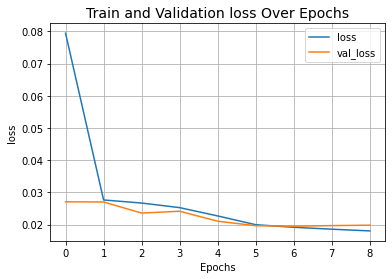

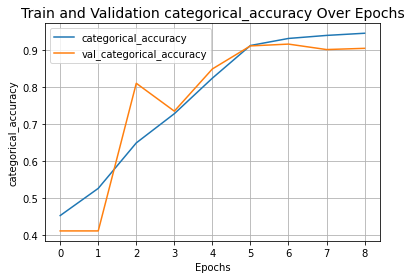

In [37]:
epochs = 20

model = make_model('lstm')
model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["categorical_accuracy"]
)

history = model.fit(
    train_dataset_lstm, validation_data=validation_dataset_lstm, epochs=epochs, callbacks=[early_stopping]
)


def plot_result(item):
  plt.plot(history.history[item], label=item)
  plt.plot(history.history["val_" + item], label="val_" + item)
  plt.xlabel("Epochs")
  plt.ylabel(item)
  plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
  plt.legend()
  plt.grid()
  plt.show()

plot_result("loss")
plot_result("categorical_accuracy")

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          5584448   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 153)               9945      
                                                                 
Total params: 5,668,697
Trainable params: 5,668,697
Non-trainable params: 0
_________________________________________________________________


## Evaluate the model

In [40]:
_, categorical_acc = model.evaluate(test_dataset_lstm)
print(f"Categorical accuracy on the test set: {round(categorical_acc * 100, 2)}%.")

15/15 [==============================] - 1s 38ms/step - loss: 0.0201 - categorical_accuracy: 0.9040
Categorical accuracy on the test set: 90.4%.


## Inference

In [42]:
# Create a model for inference.
model_for_inference = keras.Sequential([text_vectorizer_lstm, model])
predicted_probabilities = model_for_inference.predict(text_batch)

# Perform inference.
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    predicted_proba = [proba for proba in predicted_probabilities[i]]
    top_3_labels = {}
    for score, x in sorted(zip(predicted_probabilities[i], lookup.get_vocabulary()), key=lambda pair: pair[0], reverse=True)[:3]:
      top_3_labels[x] = round(score, 3)
    print(top_3_labels)
    print(f"Predicted Label(s): ({', '.join([label for label in top_3_labels])})")
    print(" ")

4/4 [==============================] - 3s 15ms/step
Abstract: b'Semantic segmentation is one of the basic topics in computer vision, it aims\nto assign semantic labels to every pixel of an image. Unbalanced semantic label\ndistribution could have a negative influence on segmentation accuracy. In this\npaper, we investigate using data augmentation approach to balance the semantic\nlabel distribution in order to improve segmentation performance. We propose\nusing generative adversarial networks (GANs) to generate realistic images for\nimproving the performance of semantic segmentation networks. Experimental\nresults show that the proposed method can not only improve segmentation\nperformance on those classes with low accuracy, but also obtain 1.3% to 2.1%\nincrease in average segmentation accuracy. It shows that this augmentation\nmethod can boost accuracy and be easily applicable to any other segmentation\nmodels.'
Label(s): ['cs.CV']
{'cs.CV': 0.998, 'eess.IV': 0.069, 'cs.LG': 0.067}
P